In [ ]:
class BTNode:
  def __init__(self, elem):
    self.elem = elem
    self.right = None
    self.left = None

In [ ]:
def inorder(root):
  if root == None:
    return

  inorder(root.left)
  print(root.elem, end = ' ')
  inorder(root.right)

In [ ]:
def tree_construction(arr, i = 1):
  if i>=len(arr) or arr[i] == None:
    return None
  p = BTNode(arr[i])
  p.left = tree_construction(arr, 2*i)
  p.right = tree_construction(arr, 2*i+1)
  return p


root2 = tree_construction([None, 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', None, None, None, 'I', 'J', None, 'k'])
inorder(root2)

H D B E A I F J C G k 

Task 1

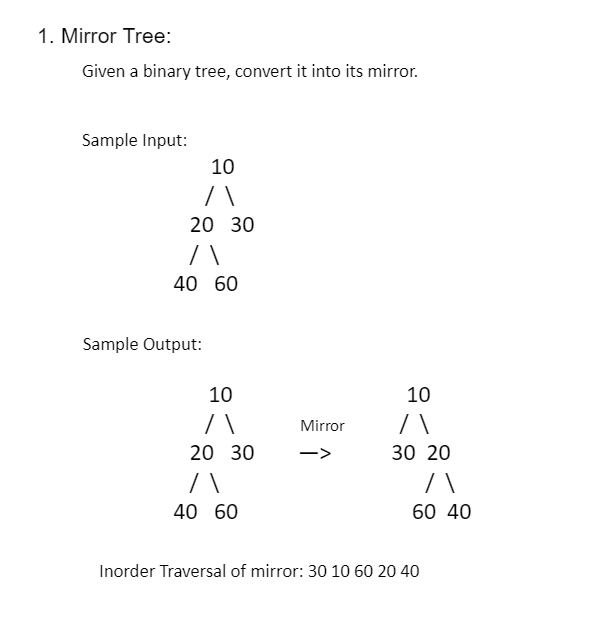

In [ ]:
def convert_mirror(root):
    if root != None:
        temp = root.left
        root.left = root.right
        root.right = temp
        convert_mirror(root.left)
        convert_mirror(root.right)
    return root



#DRIVER CODE
root = BTNode(10)
n1 = BTNode(20)
n2 = BTNode(30)
n3 = BTNode(40)
n4 = BTNode(60)

root.left = n1
root.right = n2

n1.left = n3
n1.right = n4

print('Given Tree Inorder Traversal: ', end = ' ')
inorder(root) #Given Tree Inorder Traversal:  40 20 60 10 30
print()

root2 = convert_mirror(root)
print('Mirrored Tree Inorder Traversal: ', end = ' ')
inorder(root2) #Mirrored Tree Inorder Traversal:  30 10 60 20 40

Given Tree Inorder Traversal:  40 20 60 10 30 
Mirrored Tree Inorder Traversal:  30 10 60 20 40 

In [ ]:
def convert_mirror(root):
    if root != None:

        root.left, root.right = root.right, root.left

        convert_mirror(root.left)
        convert_mirror(root.right)
    return root



#DRIVER CODE
root = BTNode(10)
n1 = BTNode(20)
n2 = BTNode(30)
n3 = BTNode(40)
n4 = BTNode(60)

root.left = n1
root.right = n2

n1.left = n3
n1.right = n4

print('Given Tree Inorder Traversal: ', end = ' ')
inorder(root) #Given Tree Inorder Traversal:  40 20 60 10 30
print()

root2 = convert_mirror(root)
print('Mirrored Tree Inorder Traversal: ', end = ' ')
inorder(root2) #Mirrored Tree Inorder Traversal:  30 10 60 20 40

Given Tree Inorder Traversal:  40 20 60 10 30 
Mirrored Tree Inorder Traversal:  30 10 60 20 40 

Task 2

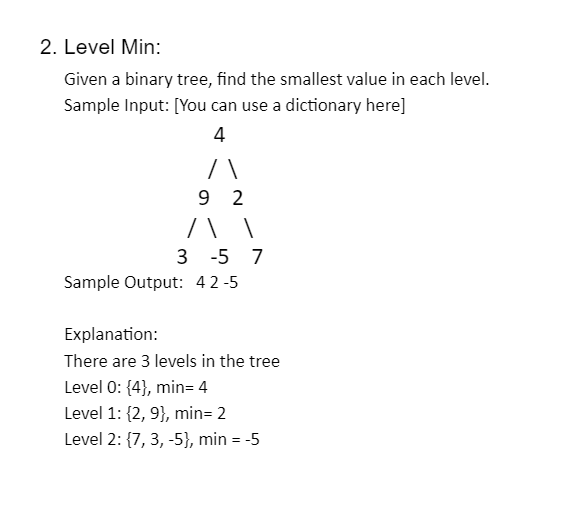

In [ ]:
def smallest_level(root, level = {}, i = 0):
    if root == None:
        return

    if i not in level:
        level[i] = root.elem
    else:
        if root.elem < level[i]:
            level[i] = root.elem
    smallest_level(root.left, level, i+1)
    smallest_level(root.right, level, i+1)
    return level



#DRIVER CODE
root = tree_construction([None, 4,9,2,3,-5,None,7])
print('Given Tree Inorder Traversal: ', end = ' ')
inorder(root) #Given Tree Inorder Traversal:  3 9 5 4 2 7
print()
print('Level Wise Smallest Value: ', end = ' ')
print(smallest_level(root)) #Level Wise Smallest Value:  {0: 4, 1: 2, 2: -5}

Given Tree Inorder Traversal:  3 9 -5 4 2 7 
Level Wise Smallest Value:  {0: 4, 1: 2, 2: -5}


In [ ]:
class Node:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def find_level_min_recursive_no_shortcuts(root):
    def helper(node, level, result):
        if not node:
            return

        # If this is the first node at this level, add its value
        if level >= len(result):
            # Extend the list manually to fit the current level
            result.insert(level, node.val)
        else:
            # Update the minimum value for the current level manually
            if node.val < result[level]:
                result[level] = node.val

        # Recurse for left and right children
        helper(node.left, level + 1, result)
        helper(node.right, level + 1, result)

    # Result list to store minimum values per level
    result = []
    helper(root, 0, result)  # Start with level 0
    return result


# Sample tree from the problem
root = Node(4)
root.left = Node(9)
root.right = Node(2)
root.left.left = Node(3)
root.left.right = Node(-5)
root.right.right = Node(7)

# Function call
print(find_level_min_recursive_no_shortcuts(root))  # Output: [4, 2, -5]


[4, 2, -5]


In [ ]:
#Another approach with array and indexing
class Node:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def find_level_min_recursive_indexing(root):
    def helper(node, level, result):
        if not node:
            return

        # If this is the first node at this level, initialize the value
        if result[level] is None:
            result[level] = node.val
        else:
            # Update the minimum value for the current level manually
            if node.val < result[level]:
                result[level] = node.val

        # Recurse for left and right children
        helper(node.left, level + 1, result)
        helper(node.right, level + 1, result)

    # Calculate the height of the tree to determine the maximum number of levels
    def get_height(node):
        if not node:
            return -1
        left_height = get_height(node.left)
        right_height = get_height(node.right)
        return max(left_height, right_height) + 1

    height = get_height(root)
    result = [None] * (height + 1)  # Initialize result list with `None` for all levels
    helper(root, 0, result)  # Start with level 0
    return result


# Sample tree from the problem
root = Node(4)
root.left = Node(9)
root.right = Node(2)
root.left.left = Node(3)
root.left.right = Node(-5)
root.right.right = Node(7)

# Function call
print(find_level_min_recursive_indexing(root))  # Output: [4, 2, -5]


[4, 2, -5]


In [ ]:
#BFS - GPT
class Node:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def level_min(root):
    if not root:
        return []

    from collections import deque

    queue = deque([root])  # Initialize queue with the root
    result = []  # To store the minimum values for each level

    while queue:
        level_size = len(queue)  # Number of nodes in the current level
        level_min = float('inf')  # Initialize the minimum for the level

        for _ in range(level_size):
            node = queue.popleft()  # Get the current node
            level_min = min(level_min, node.val)  # Update the minimum for the level

            # Add children to the queue
            if node.left:
                queue.append(node.left)
            if node.right:
                queue.append(node.right)

        result.append(level_min)  # Store the minimum value for the level

    return result


# Sample tree from the problem
root = Node(4)
root.left = Node(9)
root.right = Node(2)
root.left.left = Node(3)
root.left.right = Node(-5)
root.right.right = Node(7)

# Function call
print(level_min(root))  # Output: [4, 2, -5]


[4, 2, -5]


Task 3

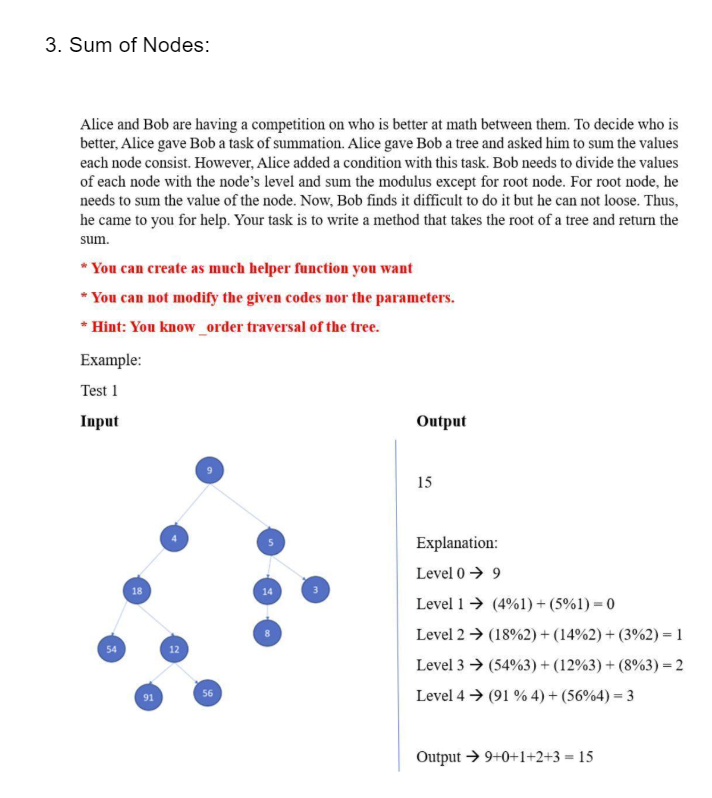

In [ ]:
def sumTree(root):
    return sum_helper(root, 0)


def sum_helper(node, level):
    if node is None:
        return 0

    if level == 0:
        value = node.elem
    else:
        value = node.elem % level

    left_sum = sum_helper(node.left, level + 1)
    right_sum = sum_helper(node.right, level + 1)


    return value + left_sum + right_sum


In [ ]:
#Driver Code
#Input 1
root1 = BTNode(9)
node2 = BTNode(4)
node3 = BTNode(5)
node4 = BTNode(18)
node5 = BTNode(14)
node6 = BTNode(3)
node7 = BTNode(54)
node8 = BTNode(12)
node9 = BTNode(8)
node10 = BTNode(91)
node11 = BTNode(56)

root1.left = node2
root1.right = node3

node2.left = node4

node3.left = node5
node3.right = node6

node4.left = node7
node4.right = node8

node5.left = node9

node8.left = node10
node8.right = node11

print(sumTree(root1)) #This should print 15

15


Task 4


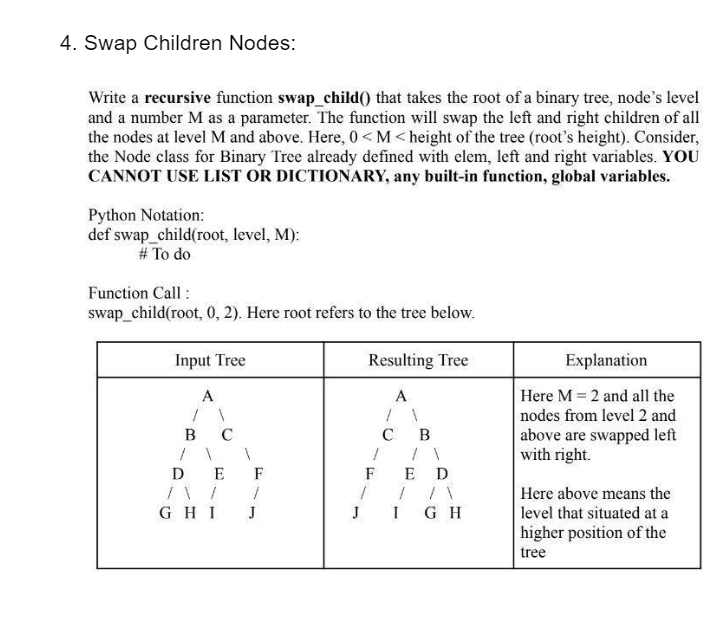

In [ ]:
def swap_child(root, level, M):
    if root is None:
        return 0
    if M > level:
        root.left, root.right = root.right, root.left
    swap_child(root.left, level+1, M)
    swap_child(root.right, level+1, M)
    return root

#Driver Code
root=BTNode('A')
#Write other nodes by yourself from the given tree of Doc File
root.left = BTNode('B')
root.right = BTNode('C')

root.left.left = BTNode('D')
root.left.right = BTNode('E')

root.right.right = BTNode('F')

root.left.left.left = BTNode('G')
root.left.left.right = BTNode('H')

root.left.right.left = BTNode('I')
root.right.right.left = BTNode('J')



print('Given Tree Inorder Traversal: ', end = ' ')
inorder(root)   #Given Tree Inorder Traversal: G D H B I E A C J F
print()

root2 = swap_child(root, 0, 2)
print('Swapped Tree Inorder Traversal: ', end = ' ')
inorder(root2)  #Swapped Tree Inorder Traversal: J F C A I E B G D H

Given Tree Inorder Traversal:  G D H B I E A C J F 
Swapped Tree Inorder Traversal:  J F C A I E B G D H 

In [ ]:
#shibly er
def swap_child(root, level, M):
  if root == None:
    return root

  if level>=M:
    return root
  elif level<M:
    root.left,root.right = root.right,root.left
    swap_child(root.left,level+1,M)
    swap_child(root.right,level+1,M)
  return root

In [ ]:
#GPT
def swap_child(root, level, M):
    if root is None:
        return

    # If current level is greater than or equal to M, swap children
    if level >= M:
        root.left, root.right = root.right, root.left

    # Recurse for left and right children with incremented level
    swap_child(root.left, level + 1, M)
    swap_child(root.right, level + 1, M)

Task 5

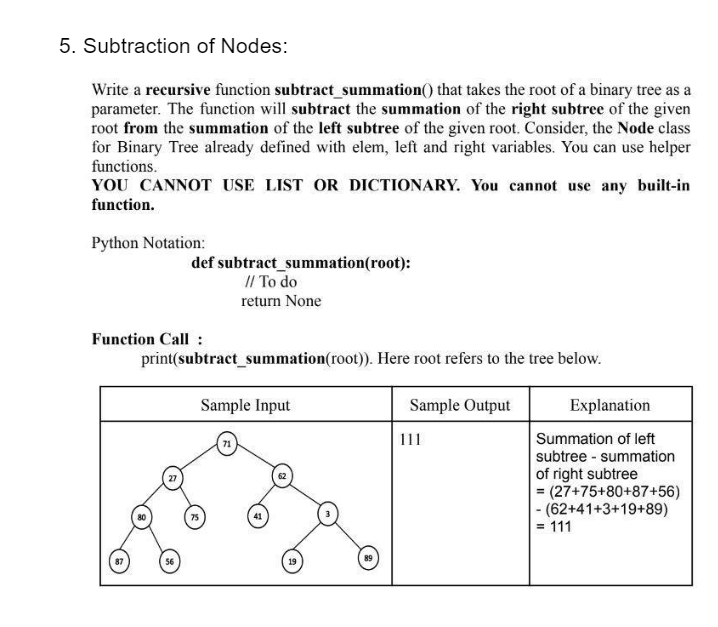

In [ ]:
def subtract_summation(root):
    left = treeSum(root.left)
    right = treeSum(root.right)
    return left - right

def treeSum(root):
    if root is None:
        return 0
    return root.elem + treeSum(root.left) + treeSum(root.right)

#Driver Code
root=BTNode(71)
#Write other nodes by yourself from the given tree of Doc File
root.left = BTNode(27)
root.right = BTNode(62)
root.left.left = BTNode(80)
root.left.right = BTNode(75)
root.right.left = BTNode(41)
root.right.right = BTNode(3)
root.left.left.left = BTNode(87)
root.left.left.right = BTNode(56)
root.right.right.left = BTNode(19)
root.right.right.right = BTNode(89)

print(subtract_summation(root)) #This should print 111

111


Bonus Task

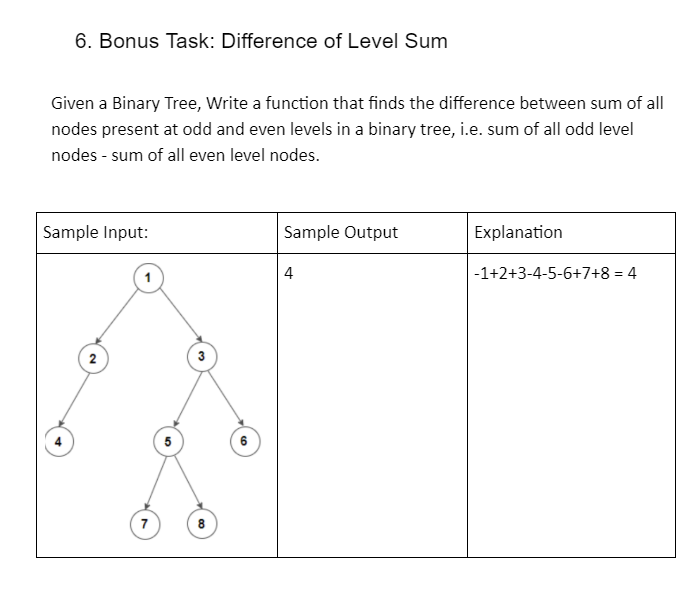

In [ ]:
def level_sum(root, level = 0):
    if root == None:
        return 0
    if level % 2 == 0:
        return -root.elem + level_sum(root.left, level+1) + level_sum(root.right, level+1)
    else:
        return +root.elem - level_sum(root.left, level+1) - level_sum(root.right, level+1)

#DRIVER CODE
root = BTNode(1)
n2 = BTNode(2)
n3 = BTNode(3)
n4 = BTNode(4)
n5 = BTNode(5)
n6 = BTNode(6)
n7 = BTNode(7)
n8 = BTNode(8)
root.left = n2
root.right = n3

n2.left = n4
n3.left = n5
n3.right = n6

n5.left = n7
n5.right = n8


print(level_sum(root)) #This should print 4

4


In [ ]:
def level_sum(root, level = 0):
    if root == None:
        return 0

    if level % 2 == 0:
        currentValue = -root.elem
    else:
        currentValue = +root.elem

    left_sum = level_sum(root.left, level + 1)
    right_sum = level_sum(root.right, level + 1)
    return currentValue + left_sum + right_sum


#DRIVER CODE
root = BTNode(1)
n2 = BTNode(2)
n3 = BTNode(3)
n4 = BTNode(4)
n5 = BTNode(5)
n6 = BTNode(6)
n7 = BTNode(7)
n8 = BTNode(8)
root.left = n2
root.right = n3

n2.left = n4
n3.left = n5
n3.right = n6

n5.left = n7
n5.right = n8


print(level_sum(root)) #This should print 4

4


In [ ]:
# GPT another solve without keeping track of level
class BTNode:
    def __init__(self, value):
        self.val = value
        self.left = None
        self.right = None

def calculate_difference(node, is_odd=True):
    if not node:
        return 0

    # Add value for odd levels, subtract for even levels
    contribution = -node.val if is_odd else +node.val

    # Recursively calculate for left and right subtrees, toggling odd/even
    left_sum = calculate_difference(node.left, not is_odd)
    right_sum = calculate_difference(node.right, not is_odd)

    return contribution + left_sum + right_sum

def level_sum(root):
    return calculate_difference(root)

# DRIVER CODE
root = BTNode(1)
n2 = BTNode(2)
n3 = BTNode(3)
n4 = BTNode(4)
n5 = BTNode(5)
n6 = BTNode(6)
n7 = BTNode(7)
n8 = BTNode(8)

root.left = n2
root.right = n3
n2.left = n4
n3.left = n5
n3.right = n6
n5.left = n7
n5.right = n8

print(level_sum(root))  # This should print 4


4


In [ ]:
def level_sum(root):
  def help(root,level):

    if root is None:
      return 0

    if level%2!=0:
        sum = -root.elem
    if level%2==0:
        sum = root.elem

    return sum + help(root.left,level+1) + help(root.right,level+1)

  return help(root,1)


#DRIVER CODE
root = BTNode(1)
n2 = BTNode(2)
n3 = BTNode(3)
n4 = BTNode(4)
n5 = BTNode(5)
n6 = BTNode(6)
n7 = BTNode(7)
n8 = BTNode(8)
root.left = n2
root.right = n3

n2.left = n4
n3.left = n5
n3.right = n6

n5.left = n7
n5.right = n8


print(level_sum(root)) #This should print 4

4


In [ ]:
#Fall-2024 Final
#well, they wanted the right to left recursion call but I did it with string manipulation -.-
class BTNode:
    def __init__(self, elem, left=None, right=None):
        self.elem = elem
        self.left = left
        self.right = right

def addEven(root):
    def helper(root, level, string):
        if root is None:
            return string
        if level % 2 == 0:
            string = str(root.elem) + " "+ string
        string = helper(root.left, level + 1, string)
        string = helper(root.right, level + 1, string)
        return string
    return helper(root, 0, string="")

root1 = BTNode(9)
node2 = BTNode(4)
node3 = BTNode(5)
node4 = BTNode(18)
node5 = BTNode(14)
node6 = BTNode(3)
node7 = BTNode(54)
node8 = BTNode(12)
node9 = BTNode(8)
node10 = BTNode(91)
node11 = BTNode(56)

root1.left = node2
root1.right = node3

node2.left = node4

node3.left = node5
node3.right = node6

node4.left = node7
node4.right = node8

node5.left = node9

node8.left = node10
node8.right = node11
print(addEven(root1))

3 14 56 91 18 9 


In [ ]:
#hudai
def addEven(root):
    def helper(root, level, string):
        if root is None:
            return
        if level % 2 == 0:
            string += str(root.elem)
            print(root.elem)
        helper(root.left, level+1, string)
        helper(root.right, level+1, string)

        return string
    return helper(root, 0, string="")

root1 = BTNode(9)
node2 = BTNode(4)
node3 = BTNode(5)
node4 = BTNode(18)
node5 = BTNode(14)
node6 = BTNode(3)
node7 = BTNode(54)
node8 = BTNode(12)
node9 = BTNode(8)
node10 = BTNode(91)
node11 = BTNode(56)

root1.left = node2
root1.right = node3

node2.left = node4

node3.left = node5
node3.right = node6

node4.left = node7
node4.right = node8

node5.left = node9

node8.left = node10
node8.right = node11
print(addEven(root1))

9
18
91
56
14
3
9
